Skład grupy:
    Paweł Awramiuk
    Anna Chojnowska
    Piotr Grusza
    Szymon Leszczyński

In [1]:
## Polecenia do instalacji pakietów
# conda install -c conda-forge tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, initializers
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

## Konfiguracje globalne
# Formatowanie liczb w DataFrame
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data_ALL = pd.read_csv("data_ALL.csv")
data_ALL

,Unnamed: 0,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,1345,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,...,0,1,0,0,0,0,0,0,0,0
1,1346,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,...,0,1,0,0,0,0,0,0,0,0
2,1347,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,...,0,1,0,0,0,0,0,0,0,0
3,1348,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,...,0,1,0,0,0,0,0,0,0,0
4,1349,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,51303,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,...,0,0,0,0,0,0,0,0,0,0
35076,51305,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,...,0,0,0,0,0,0,0,0,0,0
35077,51307,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,...,0,0,0,0,0,0,0,0,0,0
35078,51309,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data_ALL.drop(columns=['Unnamed: 0'], inplace=True)
data_ALL

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,hasParkingSpace,...,city_katowice,city_krakow,city_lodz,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw
0,-0.59,-0.74,0.14,0.64,1.00,-1.46,0.10,0.57,-0.78,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.82,-0.74,-0.58,-0.73,1.00,-1.46,0.11,0.26,-0.88,0,...,0,1,0,0,0,0,0,0,0,0
2,0.78,0.55,0.14,-1.19,-0.02,-1.43,0.13,-1.43,0.73,0,...,0,1,0,0,0,0,0,0,0,0
3,1.02,0.55,0.14,-0.28,-0.02,-1.46,0.18,1.10,-0.50,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.12,-0.74,-1.31,-1.19,-0.02,-1.41,0.13,-1.10,2.06,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,2.51,0.55,0.14,-0.73,-2.47,1.05,-1.07,-1.54,3.30,0,...,0,0,0,0,0,0,0,0,0,0
35076,2.09,1.85,-0.58,-1.19,0.92,1.06,-1.05,-0.64,-0.12,1,...,0,0,0,0,0,0,0,0,0,0
35077,2.23,1.85,0.14,-1.19,-2.01,1.05,-1.08,-1.55,1.40,0,...,0,0,0,0,0,0,0,0,0,0
35078,2.29,1.85,0.14,-1.19,0.28,1.04,-1.10,-0.59,-0.50,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35080 entries, 0 to 35079
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   squareMeters           35080 non-null  float64
 1   rooms                  35080 non-null  float64
 2   floor                  35080 non-null  float64
 3   floorCount             35080 non-null  float64
 4   buildYear              35080 non-null  float64
 5   latitude               35080 non-null  float64
 6   longitude              35080 non-null  float64
 7   centreDistance         35080 non-null  float64
 8   poiCount               35080 non-null  float64
 9   hasParkingSpace        35080 non-null  int64  
 10  hasBalcony             35080 non-null  int64  
 11  hasElevator            35080 non-null  int64  
 12  hasSecurity            35080 non-null  int64  
 13  hasStorageRoom         35080 non-null  int64  
 14  price                  35080 non-null  int64  
 15  of

In [5]:
def create_model():
    model = models.Sequential(
    [
        layers.InputLayer(input_shape=32),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mean_absolute_error',
        metrics=['mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'logcosh'])
    return model

In [6]:
features = data_ALL
labels = features.pop('price')

features = features.to_numpy()
labels = labels.to_numpy()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 127463.3516 - mean_absolute_percentage_error: 18.7722 - mean_squared_logarithmic_error: 1.7462 - logcosh: 127462.6250
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 98500.5156 - mean_absolute_percentage_error: 14.2173 - mean_squared_logarithmic_error: 0.0333 - logcosh: 98499.8203
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 96167.6797 - mean_absolute_percentage_error: 13.8292 - mean_squared_logarithmic_error: 0.0317 - logcosh: 96166.9062
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 95078.5391 - mean_absolute_percentage_error: 13.6533 - mean_squared_logarithmic_error: 0.0310 - logcosh: 95077.7266
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 93652.1797 - mean_absolute_percentage_error: 13.4502 - mean_squared

987/987 [==============================] - 5s 5ms/step - loss: 69837.4844 - mean_absolute_percentage_error: 10.1524 - mean_squared_logarithmic_error: 0.0187 - logcosh: 69836.8359
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 68986.2734 - mean_absolute_percentage_error: 10.0295 - mean_squared_logarithmic_error: 0.0183 - logcosh: 68985.5547
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 68766.7734 - mean_absolute_percentage_error: 9.9878 - mean_squared_logarithmic_error: 0.0181 - logcosh: 68766.1094
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 68787.6250 - mean_absolute_percentage_error: 10.0075 - mean_squared_logarithmic_error: 0.0182 - logcosh: 68786.9219
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 67431.5703 - mean_absolute_percentage_error: 9.7864 - mean_squared_logarithmic_error: 0.0176 - logcosh: 67430.9297
Epoch 48/50
987/987 [==============================] - 5s 5

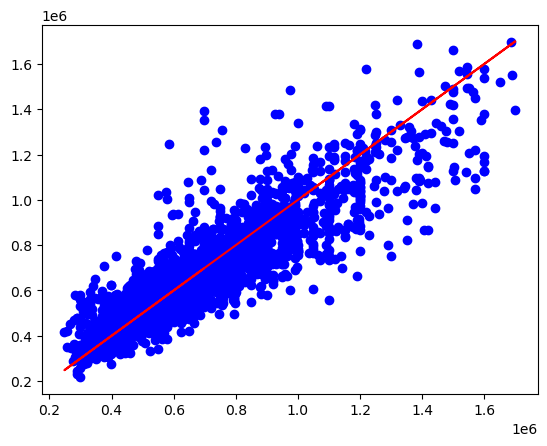

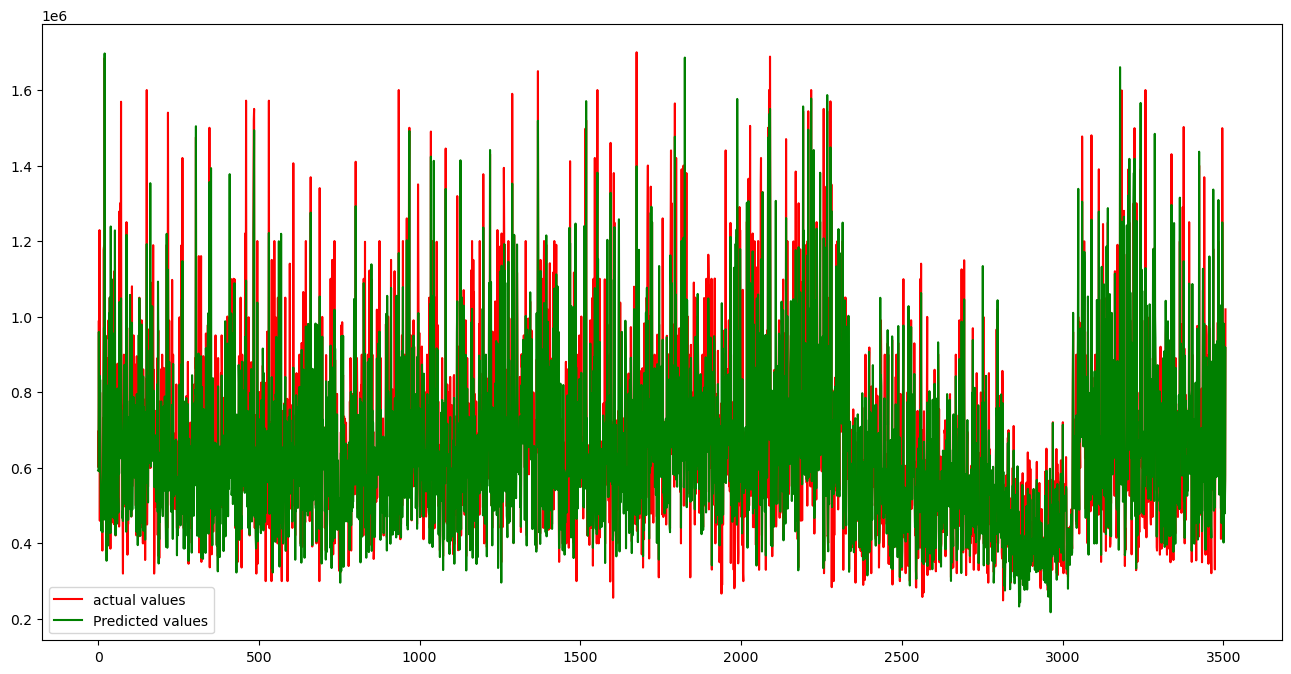

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 133931.3750 - mean_absolute_percentage_error: 19.4371 - mean_squared_logarithmic_error: 2.4409 - logcosh: 133930.7344
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 101072.9531 - mean_absolute_percentage_error: 14.4059 - mean_squared_logarithmic_error: 0.0343 - logcosh: 101072.1562
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 101062.2969 - mean_absolute_percentage_error: 14.4267 - mean_squared_logarithmic_error: 0.0344 - logcosh: 101061.7188
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 97024.5469 - mean_absolute_percentage_error: 13.8066 - mean_squared_logarithmic_error: 0.0316 - logcosh: 97023.8750
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 95453.6094 - mean_absolute_percentage_error: 13.5523 - mean_squ

987/987 [==============================] - 5s 5ms/step - loss: 72578.4531 - mean_absolute_percentage_error: 10.3987 - mean_squared_logarithmic_error: 0.0195 - logcosh: 72577.7656
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 72067.2266 - mean_absolute_percentage_error: 10.3253 - mean_squared_logarithmic_error: 0.0194 - logcosh: 72066.4922
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 71477.8672 - mean_absolute_percentage_error: 10.2002 - mean_squared_logarithmic_error: 0.0190 - logcosh: 71477.0938
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 70786.6172 - mean_absolute_percentage_error: 10.1345 - mean_squared_logarithmic_error: 0.0188 - logcosh: 70785.9531
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 71081.0625 - mean_absolute_percentage_error: 10.1740 - mean_squared_logarithmic_error: 0.0188 - logcosh: 71080.3672
Epoch 48/50
987/987 [==============================] - 5s

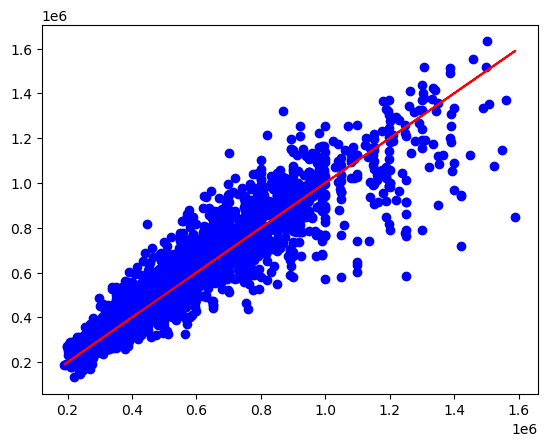

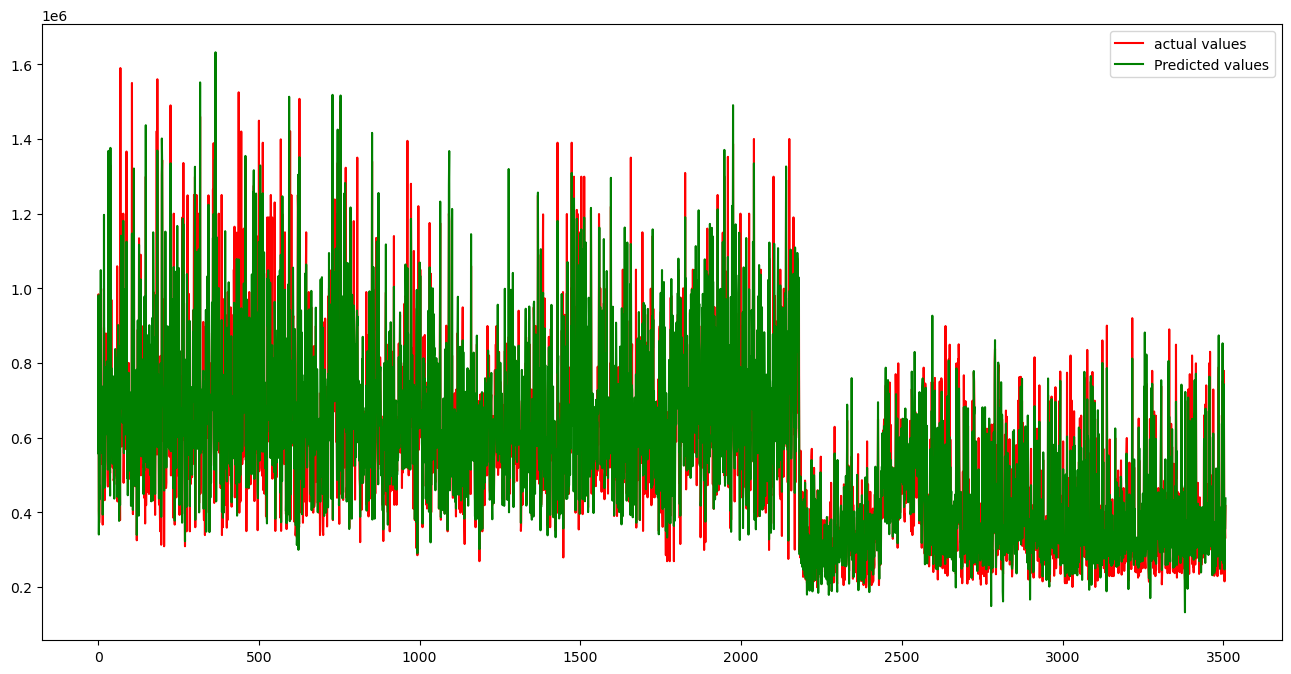

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 672416.3125 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 167.6749 - logcosh: 672415.6250
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 672414.7500 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 154.4703 - logcosh: 672414.0625
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 672414.0000 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 146.1729 - logcosh: 672413.5000
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 672412.7500 - mean_absolute_percentage_error: 99.9999 - mean_squared_logarithmic_error: 140.1489 - logcosh: 672412.3125
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 672411.8125 - mean_absolute_percentage_error: 99.9

987/987 [==============================] - 5s 5ms/step - loss: 672375.6250 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 92.0731 - logcosh: 672374.6875
Epoch 43/50
987/987 [==============================] - 5s 5ms/step - loss: 672374.1250 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 91.6281 - logcosh: 672373.5000
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 672373.9375 - mean_absolute_percentage_error: 99.9922 - mean_squared_logarithmic_error: 91.1941 - logcosh: 672373.1250
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 672372.2500 - mean_absolute_percentage_error: 99.9921 - mean_squared_logarithmic_error: 90.7708 - logcosh: 672371.5000
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 672372.2500 - mean_absolute_percentage_error: 99.9921 - mean_squared_logarithmic_error: 90.3576 - logcosh: 672371.4375
Epoch 47/50
987/987 [=====================

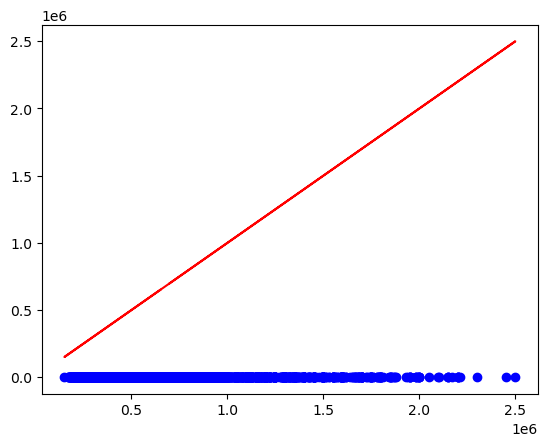

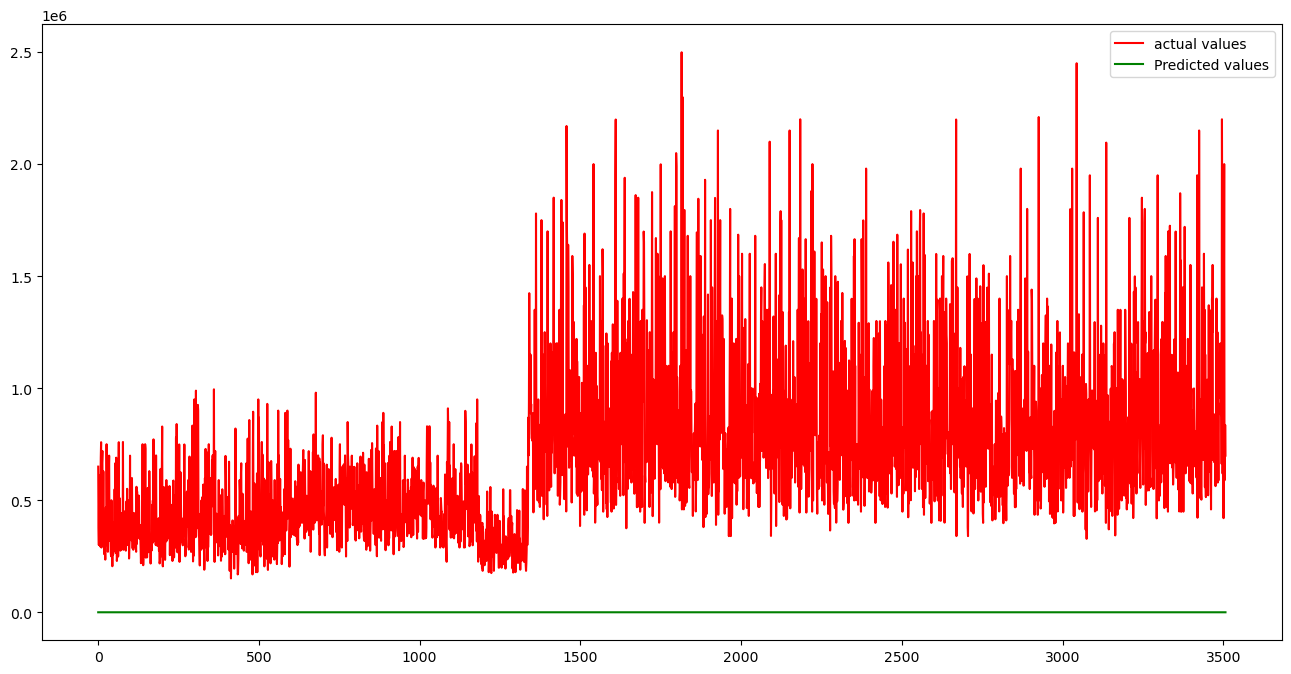

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/50
987/987 [==============================] - 5s 5ms/step - loss: 131524.5625 - mean_absolute_percentage_error: 19.5744 - mean_squared_logarithmic_error: 2.9183 - logcosh: 131523.8438
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 96744.1406 - mean_absolute_percentage_error: 14.1429 - mean_squared_logarithmic_error: 0.0330 - logcosh: 96743.4688
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 94902.4062 - mean_absolute_percentage_error: 13.8512 - mean_squared_logarithmic_error: 0.0321 - logcosh: 94901.6875
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 92640.7969 - mean_absolute_percentage_error: 13.4973 - mean_squared_logarithmic_error: 0.0305 - logcosh: 92640.0781
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 91805.4062 - mean_absolute_percentage_error: 13.3795 - mean_squared

987/987 [==============================] - 5s 5ms/step - loss: 70078.8750 - mean_absolute_percentage_error: 10.2620 - mean_squared_logarithmic_error: 0.0192 - logcosh: 70078.2109
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 69429.1797 - mean_absolute_percentage_error: 10.1719 - mean_squared_logarithmic_error: 0.0188 - logcosh: 69428.4922
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 68823.8125 - mean_absolute_percentage_error: 10.0572 - mean_squared_logarithmic_error: 0.0186 - logcosh: 68823.1484
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 68091.1094 - mean_absolute_percentage_error: 9.9721 - mean_squared_logarithmic_error: 0.0183 - logcosh: 68090.4922
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 68393.3594 - mean_absolute_percentage_error: 10.0199 - mean_squared_logarithmic_error: 0.0183 - logcosh: 68392.6719
Epoch 48/50
987/987 [==============================] - 5s 

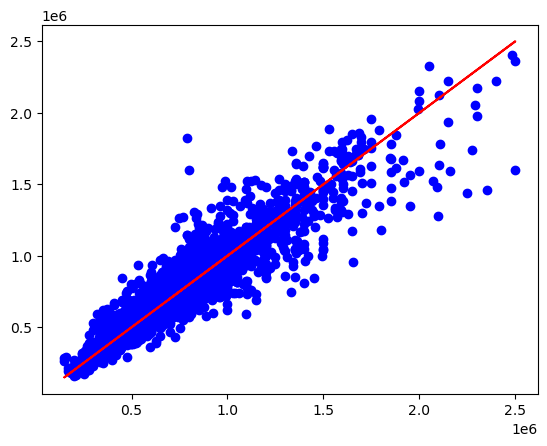

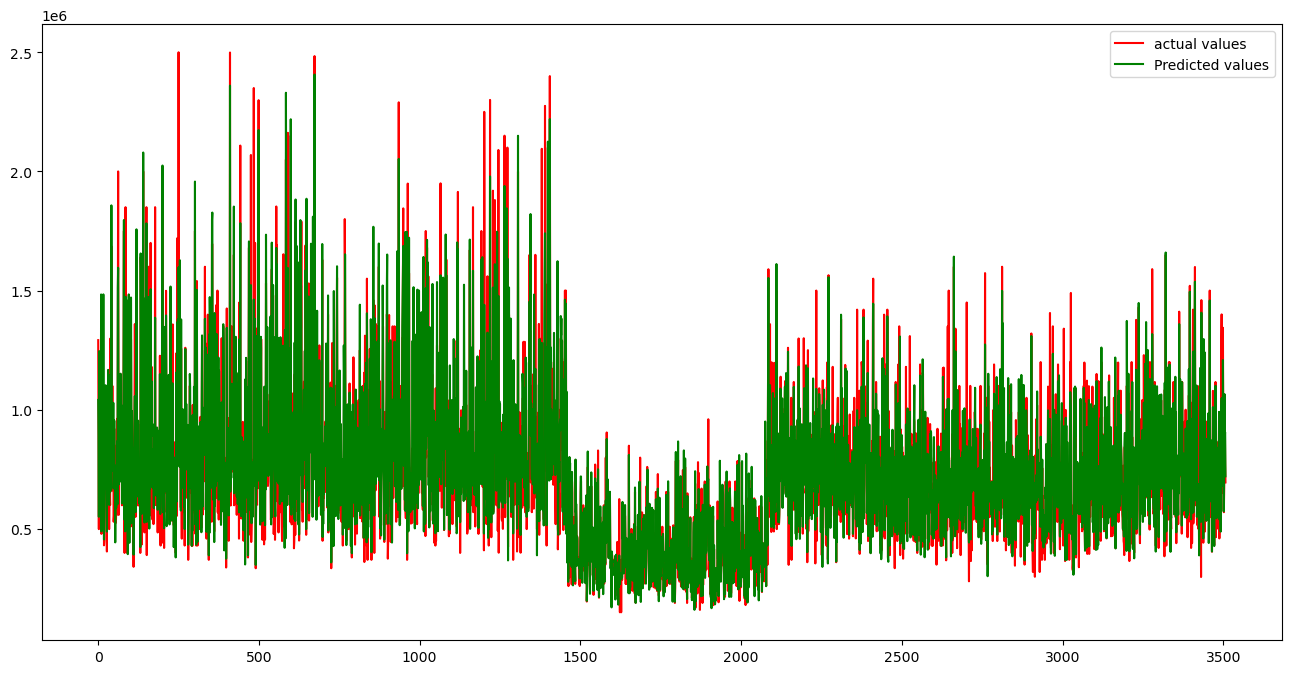

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 677383.4375 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 167.7191 - logcosh: 677382.5625
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 677381.6875 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 154.5152 - logcosh: 677381.0625
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 677381.5625 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 146.2166 - logcosh: 677380.9375
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 677380.6875 - mean_absolute_percentage_error: 99.9999 - mean_squared_logarithmic_error: 140.1912 - logcosh: 677379.8750
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 677379.2500 - mean_absolute_percentage_error: 99.9

987/987 [==============================] - 5s 5ms/step - loss: 677343.0625 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 92.1099 - logcosh: 677342.2500
Epoch 43/50
987/987 [==============================] - 5s 5ms/step - loss: 677341.2500 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 91.6648 - logcosh: 677340.6250
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 677340.4375 - mean_absolute_percentage_error: 99.9922 - mean_squared_logarithmic_error: 91.2309 - logcosh: 677339.6250
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 677340.2500 - mean_absolute_percentage_error: 99.9921 - mean_squared_logarithmic_error: 90.8075 - logcosh: 677339.6250
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 677338.8125 - mean_absolute_percentage_error: 99.9921 - mean_squared_logarithmic_error: 90.3943 - logcosh: 677338.0000
Epoch 47/50
987/987 [=====================

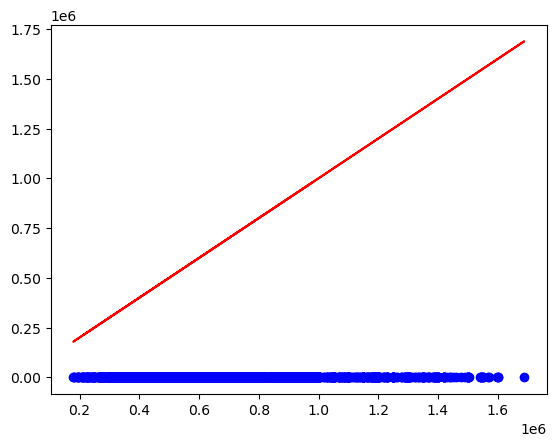

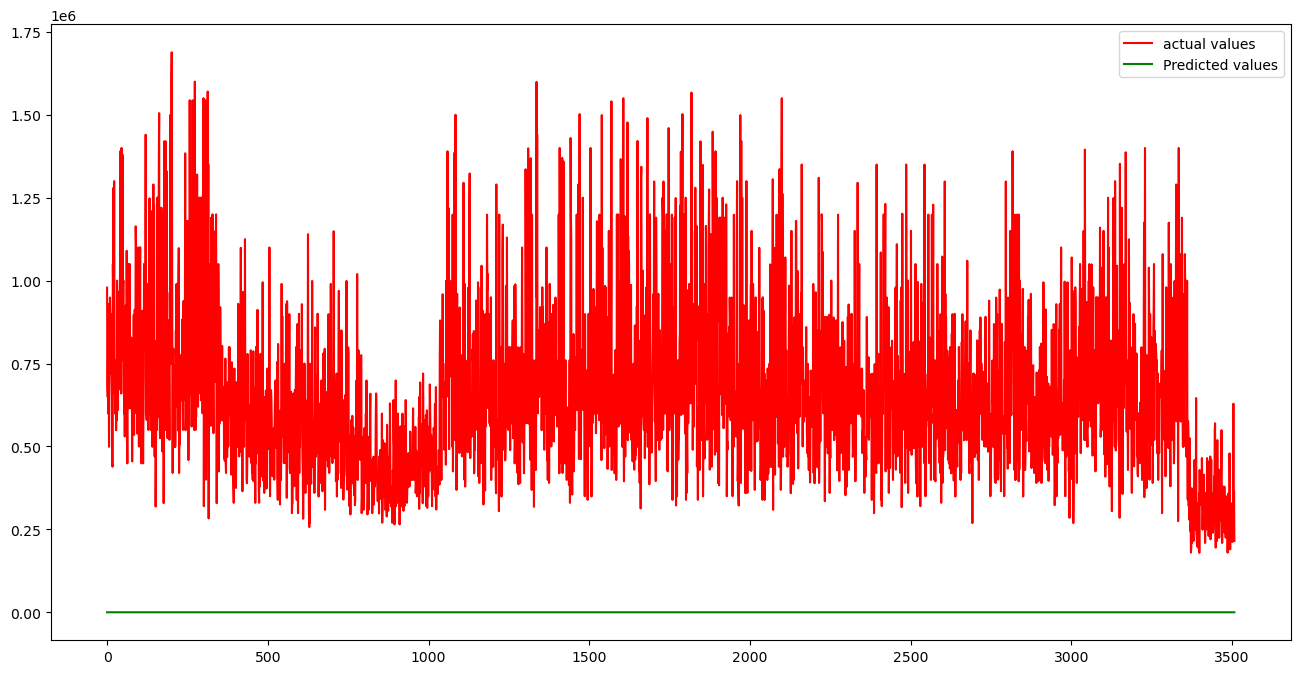

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 128088.9531 - mean_absolute_percentage_error: 18.6022 - mean_squared_logarithmic_error: 1.7507 - logcosh: 128088.2266
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 100219.4141 - mean_absolute_percentage_error: 14.3380 - mean_squared_logarithmic_error: 0.0338 - logcosh: 100218.7344
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 96912.6562 - mean_absolute_percentage_error: 13.8324 - mean_squared_logarithmic_error: 0.0319 - logcosh: 96911.9609
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 95543.5703 - mean_absolute_percentage_error: 13.5759 - mean_squared_logarithmic_error: 0.0309 - logcosh: 95542.8359
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 94084.1328 - mean_absolute_percentage_error: 13.3979 - mean_squar

987/987 [==============================] - 5s 5ms/step - loss: 70440.2500 - mean_absolute_percentage_error: 10.1311 - mean_squared_logarithmic_error: 0.0187 - logcosh: 70439.5312
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 69995.1641 - mean_absolute_percentage_error: 10.0726 - mean_squared_logarithmic_error: 0.0185 - logcosh: 69994.4688
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 69478.3984 - mean_absolute_percentage_error: 10.0115 - mean_squared_logarithmic_error: 0.0185 - logcosh: 69477.6562
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 68316.7578 - mean_absolute_percentage_error: 9.8453 - mean_squared_logarithmic_error: 0.0178 - logcosh: 68316.0469
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 68691.4922 - mean_absolute_percentage_error: 9.8809 - mean_squared_logarithmic_error: 0.0179 - logcosh: 68690.8125
Epoch 48/50
987/987 [==============================] - 5s 5

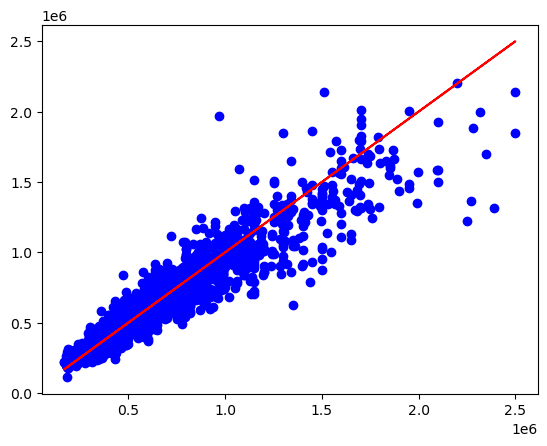

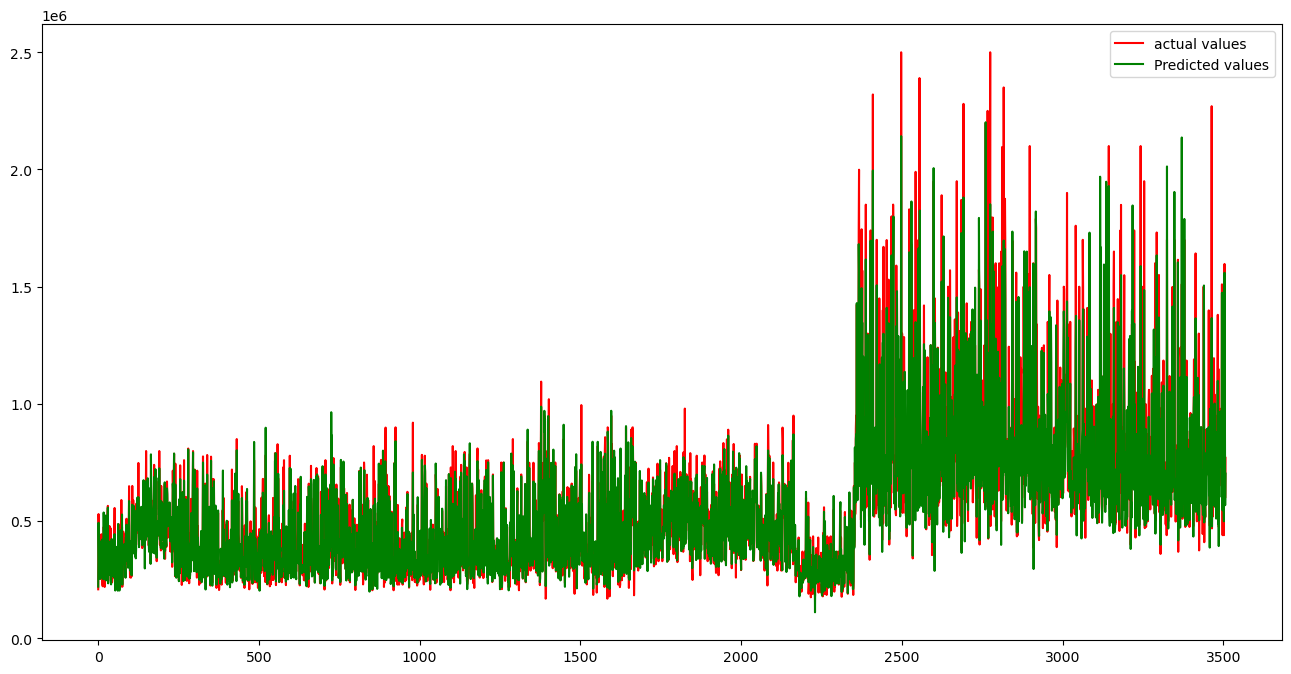

------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 129797.7266 - mean_absolute_percentage_error: 19.5526 - mean_squared_logarithmic_error: 3.0140 - logcosh: 129797.0000
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 95805.5938 - mean_absolute_percentage_error: 14.1801 - mean_squared_logarithmic_error: 0.0332 - logcosh: 95804.9609
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 92946.3359 - mean_absolute_percentage_error: 13.7059 - mean_squared_logarithmic_error: 0.0314 - logcosh: 92945.6172
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 91708.8047 - mean_absolute_percentage_error: 13.5036 - mean_squared_logarithmic_error: 0.0304 - logcosh: 91708.0859
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 90988.1484 - mean_absolute_percentage_error: 13.4195 - mean_squared

987/987 [==============================] - 5s 5ms/step - loss: 70245.1328 - mean_absolute_percentage_error: 10.3733 - mean_squared_logarithmic_error: 0.0194 - logcosh: 70244.4531
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 69150.7734 - mean_absolute_percentage_error: 10.2073 - mean_squared_logarithmic_error: 0.0190 - logcosh: 69150.0547
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 68538.1328 - mean_absolute_percentage_error: 10.1019 - mean_squared_logarithmic_error: 0.0186 - logcosh: 68537.4141
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 67763.6484 - mean_absolute_percentage_error: 9.9918 - mean_squared_logarithmic_error: 0.0184 - logcosh: 67762.9688
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 67565.5938 - mean_absolute_percentage_error: 9.9996 - mean_squared_logarithmic_error: 0.0183 - logcosh: 67564.8906
Epoch 48/50
987/987 [==============================] - 5s 5

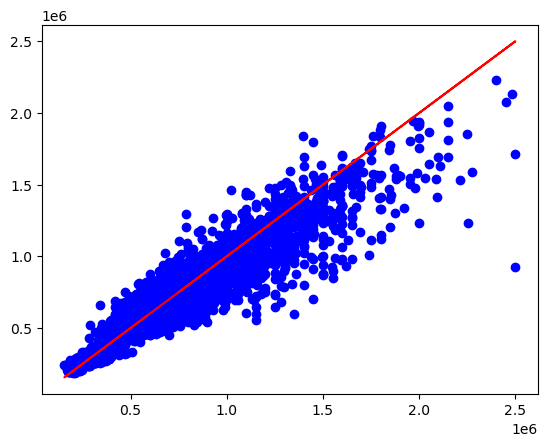

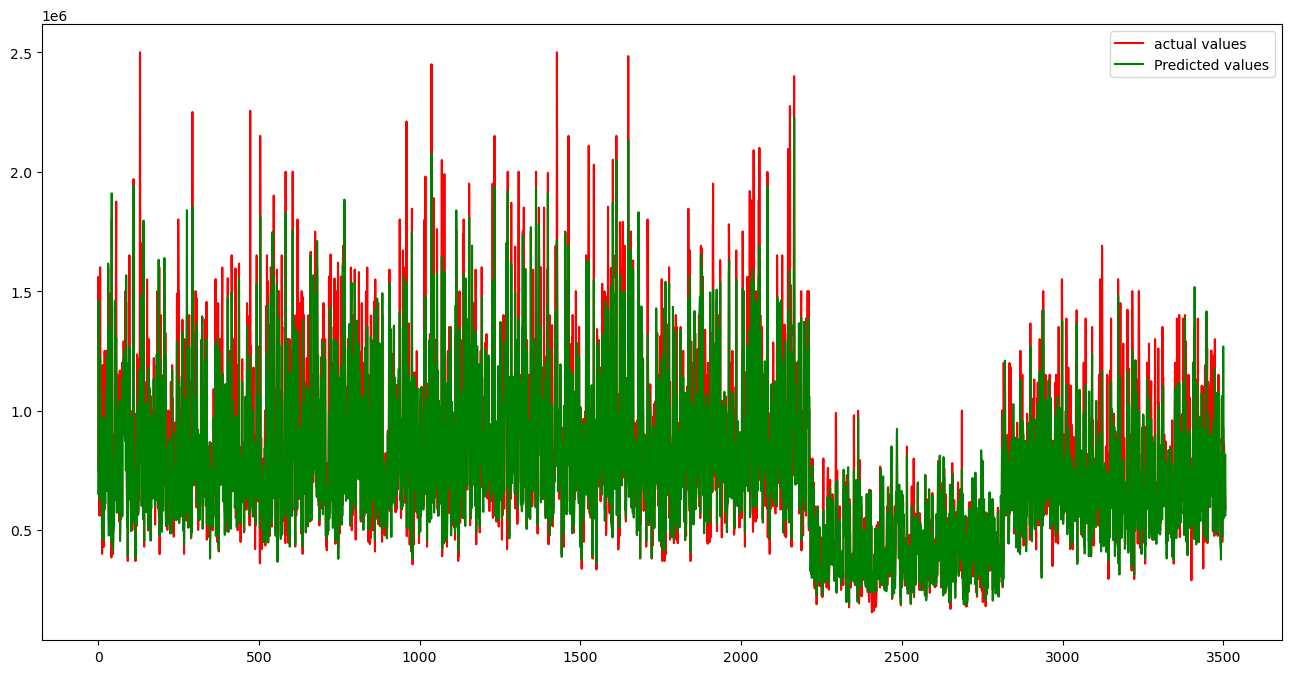

------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 137536.7188 - mean_absolute_percentage_error: 20.3846 - mean_squared_logarithmic_error: 4.3259 - logcosh: 137536.0469
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 99133.6797 - mean_absolute_percentage_error: 14.4176 - mean_squared_logarithmic_error: 0.0343 - logcosh: 99132.9688
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 94768.8516 - mean_absolute_percentage_error: 13.7432 - mean_squared_logarithmic_error: 0.0315 - logcosh: 94768.1875
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 92939.8672 - mean_absolute_percentage_error: 13.4454 - mean_squared_logarithmic_error: 0.0302 - logcosh: 92939.1406
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 92175.2109 - mean_absolute_percentage_error: 13.3461 - mean_squared

987/987 [==============================] - 5s 5ms/step - loss: 70846.5625 - mean_absolute_percentage_error: 10.3308 - mean_squared_logarithmic_error: 0.0193 - logcosh: 70845.9531
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 71128.5391 - mean_absolute_percentage_error: 10.3955 - mean_squared_logarithmic_error: 0.0196 - logcosh: 71127.8281
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 70450.8047 - mean_absolute_percentage_error: 10.2881 - mean_squared_logarithmic_error: 0.0191 - logcosh: 70450.2109
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 69050.0703 - mean_absolute_percentage_error: 10.0934 - mean_squared_logarithmic_error: 0.0186 - logcosh: 69049.3594
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 68620.4609 - mean_absolute_percentage_error: 10.0396 - mean_squared_logarithmic_error: 0.0184 - logcosh: 68619.7969
Epoch 48/50
987/987 [==============================] - 5s

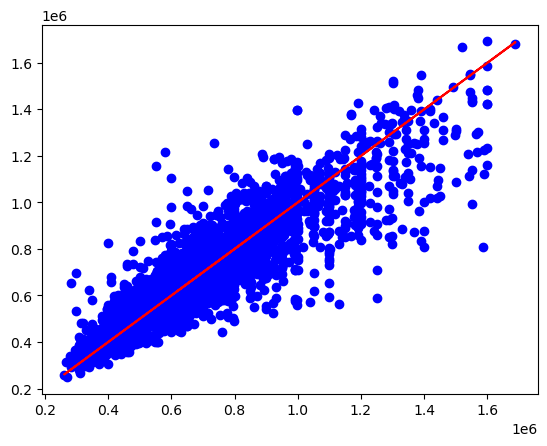

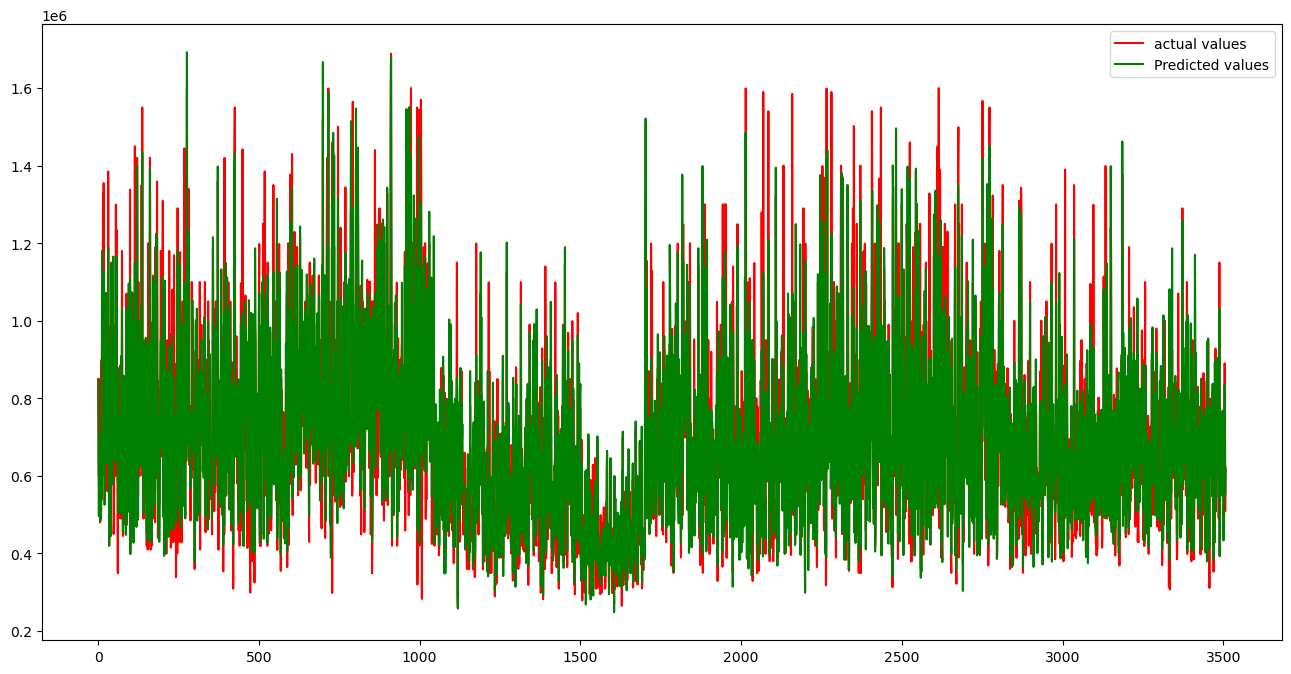

------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 689880.3750 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 168.3784 - logcosh: 689879.8125
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 689879.8750 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 155.1472 - logcosh: 689879.1250
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 689878.7500 - mean_absolute_percentage_error: 100.0000 - mean_squared_logarithmic_error: 146.8317 - logcosh: 689878.0000
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 689877.6875 - mean_absolute_percentage_error: 99.9999 - mean_squared_logarithmic_error: 140.7925 - logcosh: 689877.2500
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 689877.5625 - mean_absolute_percentage_error: 99.9

987/987 [==============================] - 5s 5ms/step - loss: 689840.3125 - mean_absolute_percentage_error: 99.9924 - mean_squared_logarithmic_error: 92.5946 - logcosh: 689839.6875
Epoch 43/50
987/987 [==============================] - 5s 5ms/step - loss: 689839.3125 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 92.1483 - logcosh: 689838.4375
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 689838.5000 - mean_absolute_percentage_error: 99.9923 - mean_squared_logarithmic_error: 91.7131 - logcosh: 689838.0000
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 689837.3125 - mean_absolute_percentage_error: 99.9922 - mean_squared_logarithmic_error: 91.2885 - logcosh: 689836.5625
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 689836.2500 - mean_absolute_percentage_error: 99.9922 - mean_squared_logarithmic_error: 90.8743 - logcosh: 689835.3750
Epoch 47/50
987/987 [=====================

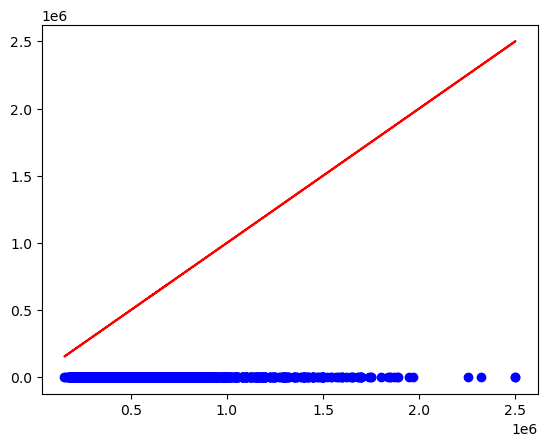

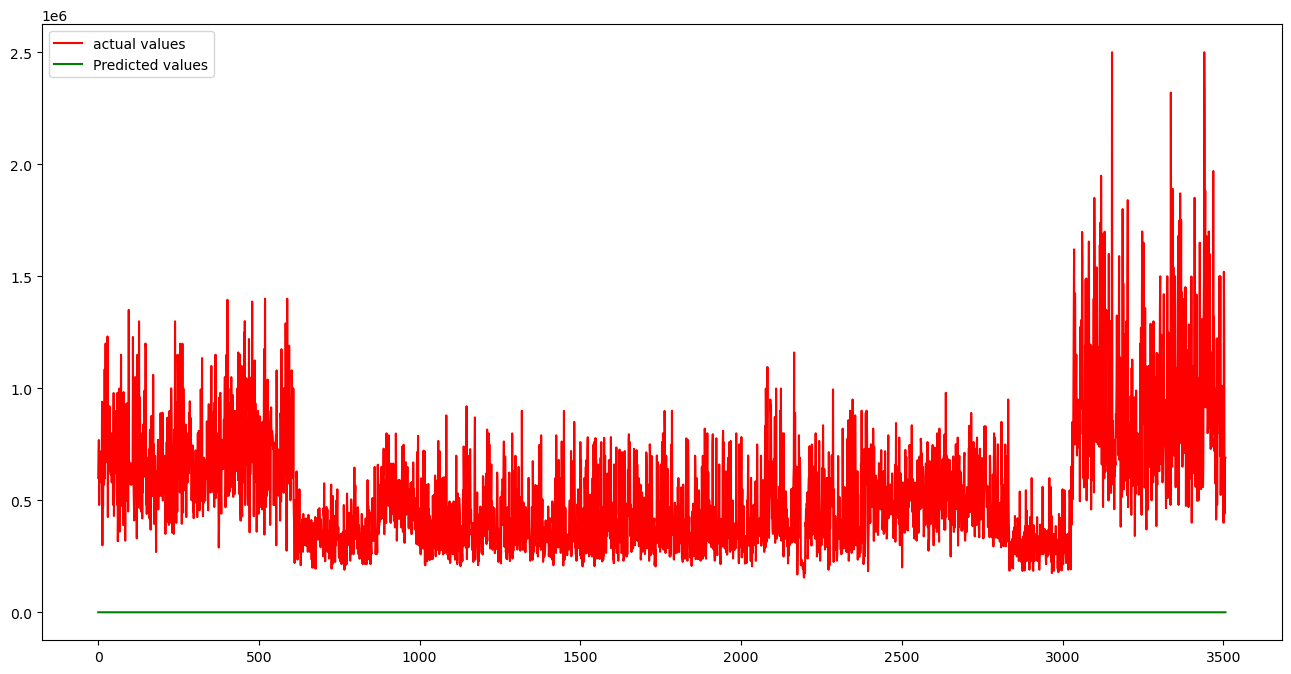

------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/50
987/987 [==============================] - 6s 5ms/step - loss: 122693.2656 - mean_absolute_percentage_error: 18.4191 - mean_squared_logarithmic_error: 1.6412 - logcosh: 122692.6719
Epoch 2/50
987/987 [==============================] - 5s 5ms/step - loss: 94296.4922 - mean_absolute_percentage_error: 14.0381 - mean_squared_logarithmic_error: 0.0327 - logcosh: 94295.8359
Epoch 3/50
987/987 [==============================] - 5s 5ms/step - loss: 92303.5547 - mean_absolute_percentage_error: 13.6795 - mean_squared_logarithmic_error: 0.0314 - logcosh: 92302.8672
Epoch 4/50
987/987 [==============================] - 5s 5ms/step - loss: 91502.1875 - mean_absolute_percentage_error: 13.5279 - mean_squared_logarithmic_error: 0.0307 - logcosh: 91501.5078
Epoch 5/50
987/987 [==============================] - 5s 5ms/step - loss: 90062.7188 - mean_absolute_percentage_error: 13.2973 - mean_square

987/987 [==============================] - 5s 5ms/step - loss: 67472.3672 - mean_absolute_percentage_error: 10.0448 - mean_squared_logarithmic_error: 0.0185 - logcosh: 67471.6328
Epoch 44/50
987/987 [==============================] - 5s 5ms/step - loss: 67187.0078 - mean_absolute_percentage_error: 10.0106 - mean_squared_logarithmic_error: 0.0184 - logcosh: 67186.3516
Epoch 45/50
987/987 [==============================] - 5s 5ms/step - loss: 66713.6953 - mean_absolute_percentage_error: 9.9408 - mean_squared_logarithmic_error: 0.0182 - logcosh: 66713.0000
Epoch 46/50
987/987 [==============================] - 5s 5ms/step - loss: 66502.6719 - mean_absolute_percentage_error: 9.9285 - mean_squared_logarithmic_error: 0.0182 - logcosh: 66501.9453
Epoch 47/50
987/987 [==============================] - 5s 5ms/step - loss: 65899.4844 - mean_absolute_percentage_error: 9.8566 - mean_squared_logarithmic_error: 0.0179 - logcosh: 65898.8047
Epoch 48/50
987/987 [==============================] - 5s 5m

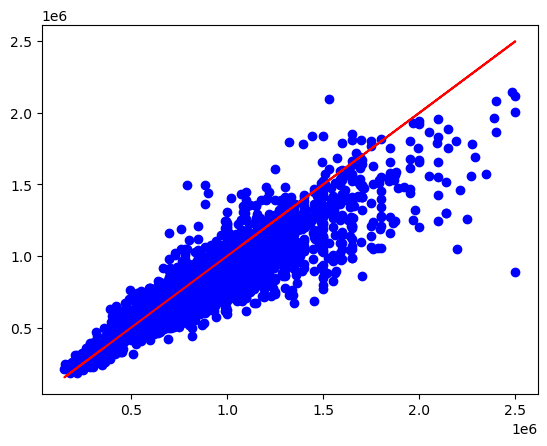

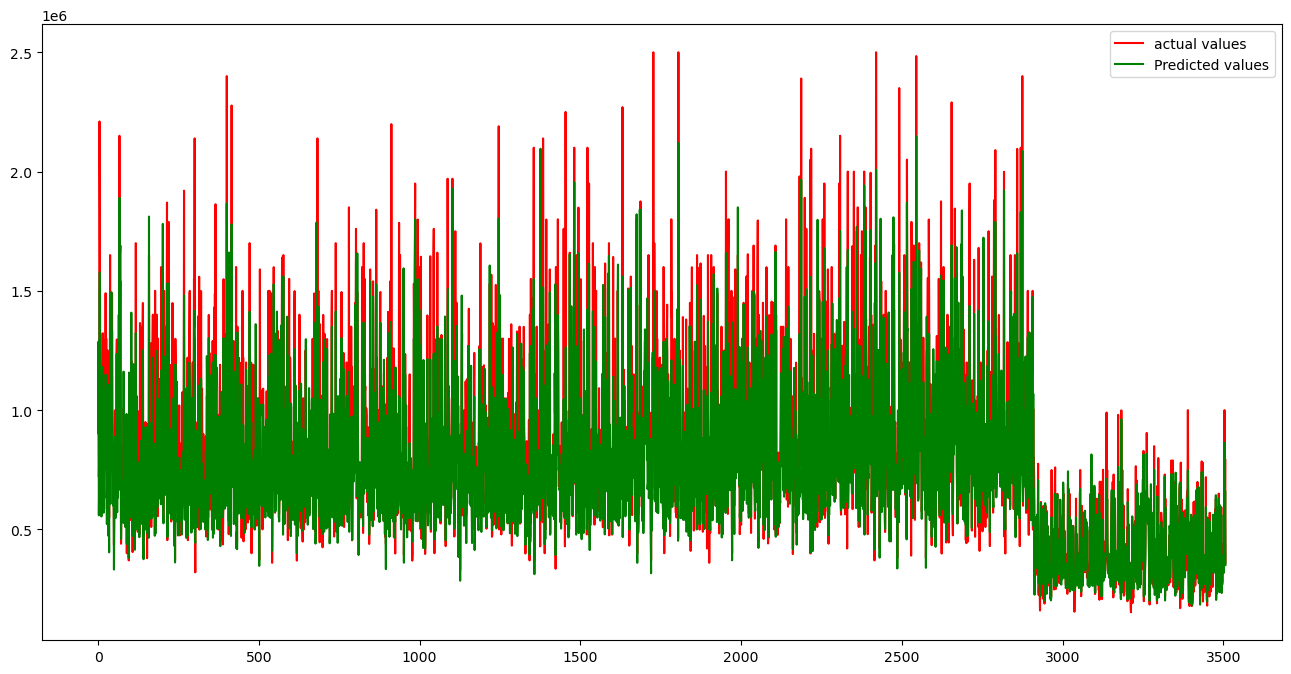

In [7]:
tf.random.set_seed(42)
kfold = KFold(n_splits=10)
fold_no = 1
for train, test in kfold.split(features, labels):
    model = create_model()
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(features[train], 
                        labels[train], 
                        epochs = 50)
    model.save('model' + str(fold_no) + '.keras')
    scores = model.evaluate(features[test], labels[test])
    preds_house = model.predict(features[test])
    print('R score is :', r2_score(labels[test], preds_house))
    print('Test metrics: ', scores)
    plt.plot(labels[test], preds_house, 'bo')
    plt.plot(labels[test], labels[test], 'r-')
    plt.show()
    # fitting the size of the plot
    plt.figure(figsize=(16, 8))
    # plotting the graphs
    plt.plot([i for i in range(len(test))],labels[test], label="actual values", c='r')
    plt.plot([i for i in range(len(test))],preds_house, label="Predicted values", c='g')
    # showing the plotting
    plt.legend()
    plt.show()
    fold_no = fold_no + 1